### 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 2. Loading the Dataset 

In [2]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### 3. EDA

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###### Selecting required columns

In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
columns = ['age','balance','duration','campaign','y']
bank_data_col = bank_data[columns]
bank_data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

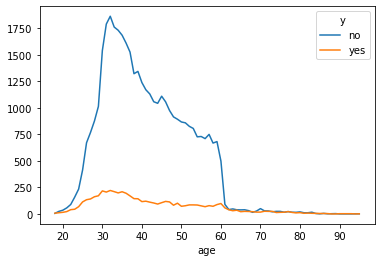

In [6]:
pd.crosstab(bank_data_col.age,bank_data_col.y).plot(kind='line')

<AxesSubplot:>

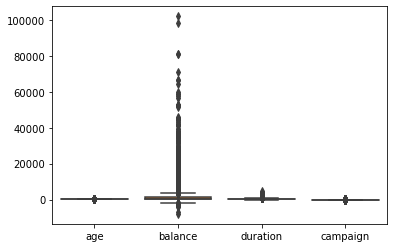

In [7]:
sb.boxplot(data=bank_data_col)

In [8]:
bank_data_col['output'] = bank_data_col.y.map({'no':0,'yes':1})
bank_data_col

,age,balance,duration,campaign,y,output
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0
...,...,...,...,...,...,...
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0


In [9]:
bank_data_col.dtypes

age          int64
balance      int64
duration     int64
campaign     int64
y           object
output       int64
dtype: object

<AxesSubplot:title={'center':'age'}, xlabel='output'>

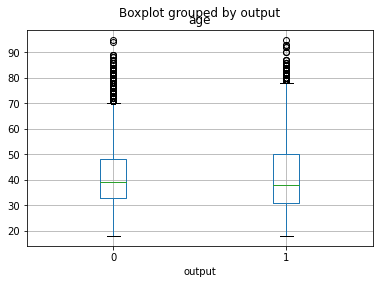

In [10]:
bank_data_col.boxplot(column='age',by='output') #quite a lot outliers found

In [11]:
input_col=['age','balance','duration','campaign']
output_col=['output']
X=bank_data_col[input_col]
y=bank_data_col[output_col]

In [12]:
X

,age,balance,duration,campaign
0,58,2143,261,1
1,44,29,151,1
2,33,2,76,1
3,47,1506,92,1
4,33,1,198,1
...,...,...,...,...
45206,51,825,977,3
45207,71,1729,456,2
45208,72,5715,1127,5
45209,57,668,508,4


In [13]:
y

,output
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


### 4. Building Model

In [14]:
lg_reg = LogisticRegression()
lg_reg.fit(X,y)

LogisticRegression()

In [15]:
lg_reg.coef_

array([[ 7.69721526e-03,  3.72191064e-05,  3.54908897e-03,
        -1.39828304e-01]])

In [16]:
lg_reg.predict_proba(X) #probability prediction

array([[0.8736739 , 0.1263261 ],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553764, 0.69446236],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [17]:
y_pred = lg_reg.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


Text(33.0, 0.5, 'Predicted Data')

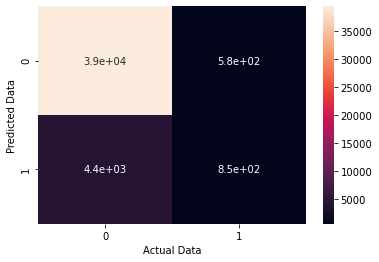

In [19]:
sb.heatmap(confusion_matrix, annot=True)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

### 5. Model Evaluation 

In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg_reg.score(X, y_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



##### ROC Curve

0.5734694329116669


Text(0, 0.5, 'True Positive Rate')

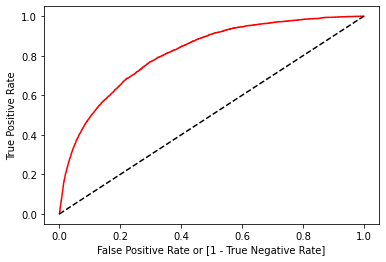

In [24]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, lg_reg.predict_proba (X)[:,1])

auc = roc_auc_score(y,y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logistic model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')